Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


### **1. Load Data**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle #membuat directory bernama kaggle 
!cp kaggle.json ~/.kaggle/ #copy file kaggle.json upload tadi ke directory baru
!chmod 600 ~/.kaggle/kaggle.json #berikan izin untuk file kaggle.json

In [ ]:
#Unduh dataset
!kaggle datasets download -d forderation/breakhis-400x

 99% 797M/803M [00:05<00:00, 160MB/s]
100% 803M/803M [00:05<00:00, 147MB/s]


In [ ]:
#ekstraksi zip
from zipfile import ZipFile 
file_name = "breakhis-400x.zip" 

with ZipFile(file_name,'r') as zip : 
  zip.extractall() 
  print('Berhasil') 

Berhasil


In [ ]:
import os
#inisialisasi path test benign
testbenign = "/content/BreaKHis 400X/test/benign" 
testmalignant = "/content/BreaKHis 400X/test/malignant" 
trainbenign = "/content/BreaKHis 400X/train/benign" 
trainmalignant = "/content/BreaKHis 400X/train/malignant" 

#mengembalikan folder tertentu berisi nama folder testbenign yang telah diinisialisasi
test_b = os.listdir(testbenign) 
test_m = os.listdir(testmalignant) 
train_b = os.listdir(trainbenign) 
train_m = os.listdir(trainmalignant) 

#print jumlah data train dan test
print ("Jumlah Train Benign :"+ str(len(train_b))) 
print ("Jumlah Train Malignant :"+ str(len(train_m))) 
print ("Jumlah Test Benign :"+ str(len(test_b))) 
print ("Jumlah Test Malignant :"+ str(len(test_m))) 

Jumlah Train Benign :371
Jumlah Train Malignant :777
Jumlah Test Benign :176
Jumlah Test Malignant :369


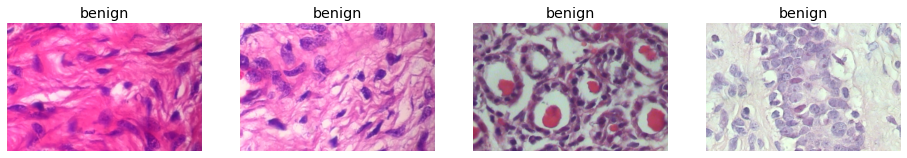

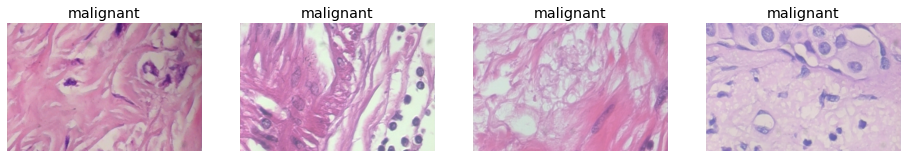

In [ ]:
#tampilkan sample
import matplotlib.pyplot as plt 
import matplotlib.image as mping 

file_train_benign=os.path.join("BreaKHis 400X/train/benign") 
file_train_malignant=os.path.join("BreaKHis 400X/train/malignant") 

benign_image = os.listdir(file_train_benign) 
malignant_image = os.listdir(file_train_malignant) 

fname1 = [os.path.join(file_train_benign,fname)
        for fname in benign_image[:4]] 

fname2 = [os.path.join(file_train_malignant,fname)
        for fname in malignant_image[:4]] 

ncolu = 4 
nrow = 2 
fig = plt.gcf() 
fig.set_size_inches(ncolu*4,nrow*4) 
for i,fname in enumerate(fname1): 
    sp = plt.subplot(3,4,i+1) 
    sp.axis('off') 
    img = mping.imread(fname) 
    plt.title('benign')
    plt.imshow(img)

plt.show()

ncolu = 4 
nrow = 2 
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('malignant')
    plt.imshow(img)
    
plt.show()

#### Contoh output kegiatan 1.3

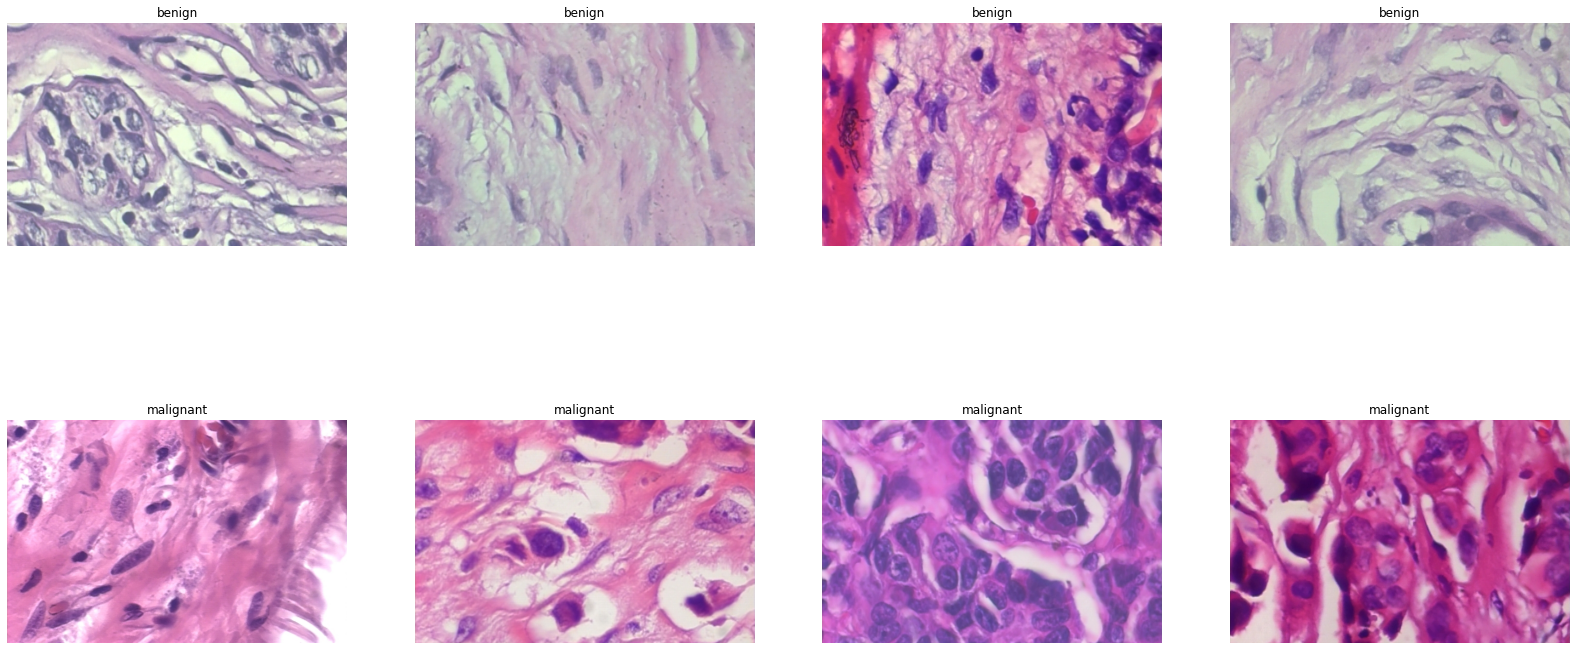

### **2. Preprocessing**

In [ ]:
import cv2 
import numpy as np 

#mengumpulkan data train
train_data = [] 
train_label = [] 

train_dir=os.path.join("BreaKHis 400X/train") 
for r, d, f in os.walk(train_dir): 
    for file in f: 
        if ".png" in file: 
            imagePath = os.path.join(r, file) 
            image = cv2.imread(imagePath) 
            image = cv2.resize(image, (250,250)) 
            train_data.append(image) 
            label = imagePath.split(os.path.sep)[-2] 
            train_label.append(label) 

train_data = np.array(train_data) 
train_label = np.array(train_label) 

In [ ]:
#mengumpulkan data test
test_data = [] 
test_label = [] 

testi_dir=os.path.join('BreaKHis 400X/test') 
for r, d, f in os.walk(testi_dir): 
    for file in f: 
        if ".png" in file: 
            imagePath = os.path.join(r, file)   
            image = cv2.imread(imagePath) 
            image = cv2.resize(image, (250,250)) 
            test_data.append(image) 
            label = imagePath.split(os.path.sep)[-2] 
            test_label.append(label) 

test_data = np.array(test_data) 
test_label = np.array(test_label) 

In [ ]:
print("Train Data = ", train_data.shape) 
print("Train Label = ", train_label.shape) 
print("Test Data = ", test_data.shape) 
print("Test Label = ", test_label.shape) 

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Test Data =  (545, 250, 250, 3)
Test Label =  (545,)


In [ ]:
#Normalisasi data
print("Data sebelum di-normalisasi ", train_data[0][0][0]) 
x_train = train_data.astype('float32') / 255.0 
x_test = test_data.astype('float32') / 255.0 
print("Data setelah di-normalisasi ", x_train[0][0][0]) 

Data sebelum di-normalisasi  [174  99 223]
Data setelah di-normalisasi  [0.68235296 0.3882353  0.8745098 ]


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[200:208]) 
print("Label sebelum di-encoder ", train_label[400:408]) 

lb = LabelEncoder()  
y_train = lb.fit_transform(train_label) 
y_test = lb.fit_transform(test_label) 

print("Label setelah di-encoder ", y_train[200:208]) 
print("Label setelah di-encoder ", y_train[400:408]) 

Label sebelum di-encoder  ['benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign' 'benign']
Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant']
Label setelah di-encoder  [0 0 0 0 0 0 0 0]
Label setelah di-encoder  [1 1 1 1 1 1 1 1]


### **3. Modelling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPooling2D, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalAveragePooling2D

In [ ]:
#model scenario pertama
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3])) 

#lanjut ke hidden layer
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=2, padding='same'))


model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(GlobalAveragePooling2D())


model.add(Flatten())


model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))


print(model.summary()) 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
global_average_pooling2d_4 ( (None, 32)                0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              

In [ ]:
from tensorflow.keras.optimizers import Adam #library

model.compile(optimizer=Adam(lr=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 4s 83ms/step - loss: 0.6498 - acc: 0.6751 - val_loss: 0.6282 - val_acc: 0.6771
Epoch 2/100
36/36 [==============================] - 3s 71ms/step - loss: 0.6252 - acc: 0.6768 - val_loss: 0.6208 - val_acc: 0.6771
Epoch 3/100
36/36 [==============================] - 3s 71ms/step - loss: 0.6141 - acc: 0.6768 - val_loss: 0.6075 - val_acc: 0.6771
Epoch 4/100
36/36 [==============================] - 3s 71ms/step - loss: 0.5882 - acc: 0.6768 - val_loss: 0.5761 - val_acc: 0.6771
Epoch 5/100
36/36 [==============================] - 3s 71ms/step - loss: 0.5446 - acc: 0.7195 - val_loss: 0.5342 - val_acc: 0.6881
Epoch 6/100
36/36 [==============================] - 3s 71ms/step - loss: 0.4912 - acc: 0.7953 - val_loss: 0.4976 - val_acc: 0.8092
Epoch 7/100
36/36 [==============================] - 3s 72ms/step - loss: 0.4554 - acc: 0.8275 - val_loss: 0.4777 - val_acc: 0.8367
Epoch 8/100
36/36 [==============================] - 3s 71ms/step - loss: 0.

In [ ]:
#model scenario kedua
model2 = Sequential()


model2.add(InputLayer(input_shape=[250,250,3]))

#lanjut ke hidden layer
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))

model2.add(AveragePooling2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))

model2.add(AveragePooling2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))


model2.add(AveragePooling2D(pool_size=2, padding='same'))


model2.add(GlobalMaxPooling2D())


model2.add(Flatten())


model2.add(Dense(512, activation='relu'))

model2.add(Dense(256, activation='relu'))

model2.add(Dense(128, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))


print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d_4 (Average (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_5 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_6 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 64)               

In [ ]:
model2.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

H2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
36/36 [==============================] - 6s 113ms/step - loss: 0.6431 - acc: 0.6768 - val_loss: 0.6257 - val_acc: 0.6771
Epoch 2/100
36/36 [==============================] - 3s 82ms/step - loss: 0.6223 - acc: 0.6768 - val_loss: 0.6211 - val_acc: 0.6771
Epoch 3/100
36/36 [==============================] - 3s 82ms/step - loss: 0.6179 - acc: 0.6768 - val_loss: 0.6148 - val_acc: 0.6771
Epoch 4/100
36/36 [==============================] - 3s 81ms/step - loss: 0.6074 - acc: 0.6768 - val_loss: 0.5992 - val_acc: 0.6771
Epoch 5/100
36/36 [==============================] - 3s 81ms/step - loss: 0.5759 - acc: 0.6768 - val_loss: 0.5631 - val_acc: 0.6771
Epoch 6/100
36/36 [==============================] - 3s 80ms/step - loss: 0.5291 - acc: 0.7230 - val_loss: 0.5197 - val_acc: 0.7780
Epoch 7/100
36/36 [==============================] - 3s 82ms/step - loss: 0.4905 - acc: 0.8084 - val_loss: 0.5181 - val_acc: 0.7523
Epoch 8/100
36/36 [==============================] - 3s 81ms/step - loss: 0

### **4. Result**

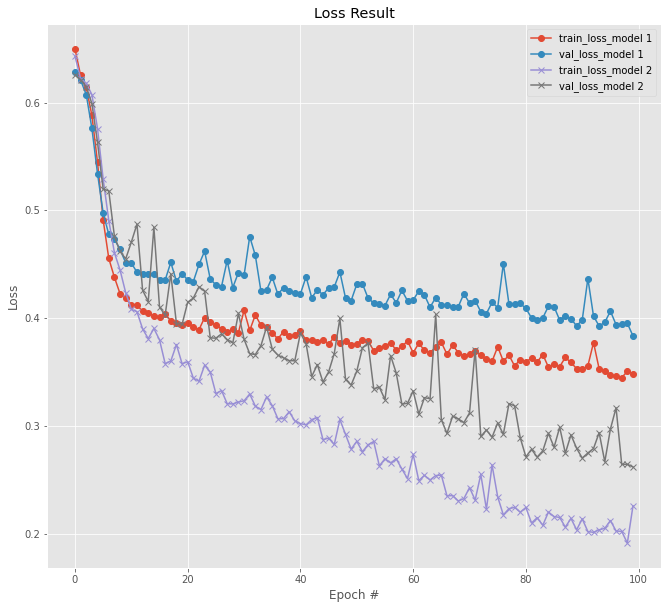

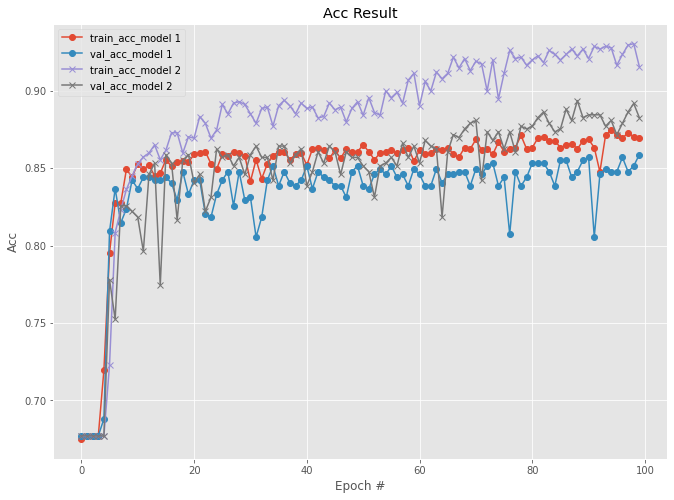

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.style.use("ggplot") 
plt.figure(figsize=(11,10)) 
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss_model 1",marker='o') 
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss_model 1",marker='o') 
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss_model 2",marker='x') 
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss_model 2",marker='x') 
plt.title("Loss Result") 
plt.xlabel("Epoch #") 
plt.ylabel("Loss") 
plt.legend() 
plt.show() 

plt.style.use("ggplot")
plt.figure(figsize=(11,8))
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc_model 1",marker='o') 
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc_model 1",marker='o') 
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc_model 2",marker='x') 
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc_model 2",marker='x') 
plt.title("Acc Result") 
plt.xlabel("Epoch #") 
plt.ylabel("Acc") 
plt.legend() 
plt.show()

0 for benign,1 for malignant
ini hasil dari model1: [1]
ini hasil dari model2: [0]


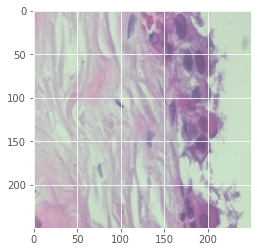

In [ ]:
from keras.preprocessing.image import img_to_array, array_to_img 
from keras.preprocessing import image

img_ = image.load_img("/content/BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png", target_size=(250, 250)) 
imag = image.img_to_array(img_) 
imag = np.expand_dims(imag, axis=0) 

pred = model.predict(imag) 
pred2 = model2.predict(imag) 
pred = np.argmax(pred,axis=1) 
pred2 = np.argmax(pred2,axis=1) 
print("0 for benign,1 for malignant") 
print("ini hasil dari model1:",pred) 
print("ini hasil dari model2:",pred2) 

plt.imshow(img_)

In [ ]:
from sklearn.metrics import classification_report 

target_names = ['benign', 'malignant'] 

pred = model.predict(x_test) 
labels = (pred > 0.5).astype(np.int) 
labels = np.argmax(labels, axis=1)
print('model 1') 
print(classification_report(y_test,  labels, target_names=target_names)) 

model 1
              precision    recall  f1-score   support

      benign       0.87      0.66      0.75       176
   malignant       0.86      0.95      0.90       369

    accuracy                           0.86       545
   macro avg       0.86      0.81      0.83       545
weighted avg       0.86      0.86      0.85       545



In [ ]:
pred2 = model2.predict(x_test) 
labels2 = (pred2 > 0.5).astype(np.int) 
print('model 2') 
print(classification_report(y_test, labels2))   

model 2
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       176
           1       0.92      0.91      0.91       369

    accuracy                           0.88       545
   macro avg       0.87      0.87      0.87       545
weighted avg       0.88      0.88      0.88       545

